# Impact Functions

Impact functions relate the hazard intensity to a percentage of damage in the exposure. Every hazard and exposure type are characterized by an impact function. Single impact functions are defined using the class `ImpactFunc` and they are gathered in a container of type `ImpactFuncSet`.

# ImpactFunc class

Contains the definition of one impact function. Attributes:
 * haz_type (str): hazard type acronym (e.g. 'TC')
 * id (int or str): id of the impact function. Exposures of the same type will refer to the same impact function id
 * name (str): name of the impact function
 * intensity_unit (str): unit of the intensity
 * intensity (np.array): intensity values
 * mdd (np.array): mean impact degree for each intensity (numbers in [0,1])
 * paa (np.array): percentage of affected assets (exposures) for each intensity (numbers in [0,1])
 
After defining an impact function, use its `check()` method to check that the attributes have been set correctly. The `calc_mdr()` method will be used to compute the Mean Damage Ratio (mdr = mdd * paa) of the exposures at each point. 

2019-05-15 07:57:31,779 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
Mean damage ratio at intensity 18.7:  0.010130888584982699


(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a1f5d32b0>])

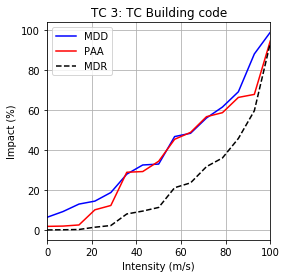

In [1]:
%matplotlib inline
import numpy as np
from climada.entity import ImpactFunc

imp_fun = ImpactFunc() 
imp_fun.haz_type = 'TC'
imp_fun.id = 3
imp_fun.name = 'TC Building code'
imp_fun.intensity_unit = 'm/s'
imp_fun.intensity = np.linspace(0, 100, num=15)
imp_fun.mdd = np.sort(np.random.rand(15))
imp_fun.paa = np.sort(np.random.rand(15))
imp_fun.check()

print('Mean damage ratio at intensity 18.7: ', imp_fun.calc_mdr(18.7))

# plot impact function
imp_fun.plot()

Derivated classes of `ImpactFunc` define different types of impact functions, as for example the tropical cyclones winds in `IFTropCyclone`:

(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a1f8eb710>])

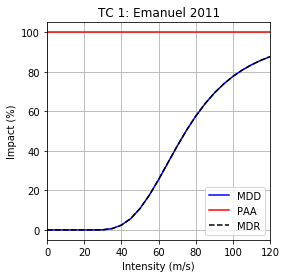

In [2]:
from climada.entity import IFTropCyclone

if_tc = IFTropCyclone()
if_tc.set_emanuel_usa()
if_tc.plot()

# ImpactFuncSet class

`ImpactFuncSet` is a container which handles impact functions of type `ImpactFunc`. An impact function can be added and removed using the methods `add_func()` and `remove_func()` respectively. Impact functions can be retrieved using the impact `get_func()`. Use the `check()` method to make sure that the impact functions have been properly set.

`ImpactFuncSet` contains the attribute `tag` of type `Tag`, which stores information about the data: the original file name and a description.

In [3]:
from climada.entity import ImpactFuncSet
help(ImpactFuncSet)

Help on class ImpactFuncSet in module climada.entity.impact_funcs.impact_func_set:

class ImpactFuncSet(builtins.object)
 |  Contains impact functions of type ImpactFunc. Loads from
 |  files with format defined in FILE_EXT.
 |  
 |  Attributes:
 |      tag (Tag): information about the source data
 |      _data (dict): contains ImpactFunc classes. It's not suppossed to be
 |          directly accessed. Use the class methods instead.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Empty initialization.
 |      
 |      Examples:
 |          Fill impact functions with values and check consistency data:
 |      
 |          >>> fun_1 = ImpactFunc()
 |          >>> fun_1.haz_type = 'TC'
 |          >>> fun_1.id = 3
 |          >>> fun_1.intensity = np.array([0, 20])
 |          >>> fun_1.paa = np.array([0, 1])
 |          >>> fun_1.mdd = np.array([0, 0.5])
 |          >>> imp_fun = ImpactFuncSet()
 |          >>> imp_fun.append(fun_1)
 |          >>> imp_fun.check()
 |      

(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a1f39a0b8>])

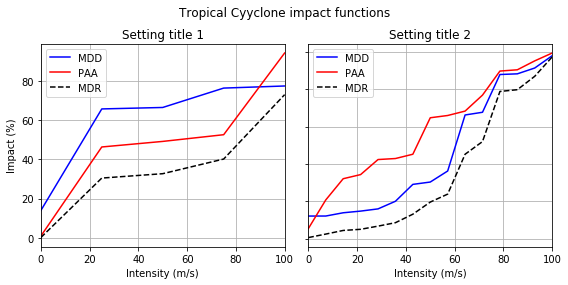

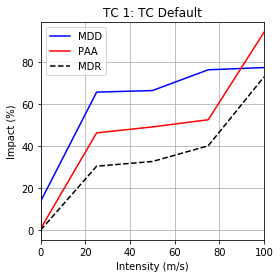

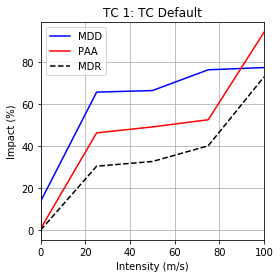

In [4]:
# build impact functions
import numpy as np
import matplotlib.pyplot as plt
from climada.entity import ImpactFunc, ImpactFuncSet

imp_fun_1 = ImpactFunc() 
imp_fun_1.haz_type = 'TC'
imp_fun_1.id = 1
imp_fun_1.name = 'TC Default'
imp_fun_1.intensity_unit = 'm/s'
imp_fun_1.intensity = np.linspace(0, 100, num=5)
imp_fun_1.mdd = np.sort(np.random.rand(5))
imp_fun_1.paa = np.sort(np.random.rand(5))

imp_fun_3 = ImpactFunc() 
imp_fun_3.haz_type = 'TC'
imp_fun_3.id = 3
imp_fun_3.name = 'TC Building code'
imp_fun_3.intensity_unit = 'm/s'
imp_fun_3.intensity = np.linspace(0, 100, num=15)
imp_fun_3.mdd = np.sort(np.random.rand(15))
imp_fun_3.paa = np.sort(np.random.rand(15))

# fill ImpactFuncSet
if_set = ImpactFuncSet()
if_set.append(imp_fun_1)
if_set.append(imp_fun_3)
# plots can be modified using matplotlib as follows:
fig, axes = if_set.plot()
axes[0].get_shared_y_axes().join(axes[0], axes[1])
axes[0].set_title('Setting title 1')
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Setting title 2')
fig.suptitle('Tropical Cyyclone impact functions')

plt.tight_layout()
plt.subplots_adjust(top=0.85)

# select impact functions
if_tc_1 = if_set.get_func('TC', 1)
if_tc_1.plot()

# remove impact function of id 3 and type TC
if_set.remove_func('TC', 3)
if_set.plot()

## Read impact functions of an Excel file

Impact functions defined in an excel file following the template provided in sheet `impact_functions` of `climada_python/data/system/entity_template.xlsx` can be ingested directly using the method `read_excel()`.

Read file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx


(<Figure size 288x864 with 11 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a1fec1da0>])

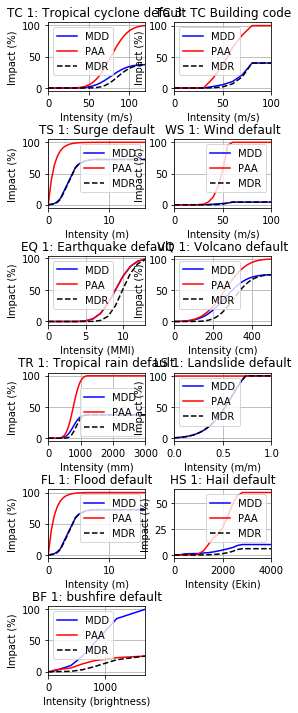

In [5]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
imp_set = ImpactFuncSet()
imp_set.read_excel(file_name)
print('Read file:', imp_set.tag.file_name)
imp_set.plot() # plot all impact functions

## Write impact functions

Impact functions can be writen in Excel format using `write_excel()` method.

In [6]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
imp_set = ImpactFuncSet()
imp_set.read_excel(file_name)

# write file
imp_set.write_excel('tutorial_if_set.xlsx')

Pickle can always be used as well:

In [7]:
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('tutorial_if_set.p', imp_set)

2019-05-15 07:57:36,403 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/doc/tutorial/results/tutorial_if_set.p
